# Normalization

In [2]:
#load packages
import pandas as pd
import numpy as np
from my_functions import *
import pyRserve
import os.path
import gc
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import random

In [5]:
geo_data_27k = [
    'GSE27317', 
    'GSE41037', 
    'GSE38873', 
    'GSE15745', 
    'GSE32393', 
    'GSE25892', 
    'GSE20242', 
    'GSE22595', 
    'GSE37988', 
    'GSE17448', 
    'GSE36642', 
    'GSE26126', 
    'GSE34035', 
    'GSE28746',
    'GSE20236',
    'GSE19711',
    'GSE37008',
    'GSE36812',
    'GSE34257',
    'GSE38608',
    'GSE38291',
    'GSE36166',
    'GSE63384',
    'GSE59274',
    'GSE57285',
    'GSE56606',
    'GSE49908',
    'GSE49907',
    'GSE49905',
    'GSE49904'
]

geo_data_450k = [
    'GSE90124', 
    'GSE115797',
    'GSE99624', 
    'GSE108213',
    'GSE92767', 
    'GSE69176',
    'GSE40360',
    'GSE59157', 
    'GSE42861',
    'GSE77241',
    'GSE148000'
]      

array_express_27k = [
    'E-GEOD-43256',
    'E-GEOD-64940',
    'E-MTAB-2344',
    'E-GEOD-62867',
    'E-GEOD-44763',
    'E-GEOD-48988',
    'E-GEOD-58119',
    'E-GEOD-58045',
    'E-GEOD-57484',
    'E-GEOD-54211',
    'E-GEOD-56342',
    'E-GEOD-27044',
    'E-GEOD-36194',
    'E-GEOD-21232',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-30758',
    'E-GEOD-32396',
    'E-GEOD-31979',
    'E-MTAB-625',
    'E-MTAB-487'
]

array_express_450k = [
    'E-MTAB-2372',
    'E-GEOD-73832',
    'E-GEOD-71678',
    'E-GEOD-71245',
    'E-GEOD-83334',
    'E-GEOD-75248',
    'E-GEOD-77955',
    'E-GEOD-67705',
    'E-GEOD-77445',
    'E-GEOD-79056',
    'E-GEOD-72556',
    'E-GEOD-52068',
    'E-GEOD-74738',
    'E-GEOD-76105',
    'E-GEOD-65638',
    'E-GEOD-71955',
    'E-GEOD-63106',
    'E-GEOD-73377',
    'E-GEOD-56515',
    'E-GEOD-73103',
    'E-GEOD-67024',
    'E-GEOD-72338',
    'E-GEOD-59457',
    'E-GEOD-64511',
    'E-GEOD-64495',
    'E-GEOD-59509',
    'E-GEOD-67444',
    'E-GEOD-62219',
    'E-GEOD-51954',
    'E-GEOD-52588',
    'E-GEOD-36054',
    'E-GEOD-50660',
    'E-GEOD-61259',
    'E-GEOD-61258',
    'E-GEOD-61257',
    'E-GEOD-61454',
    'E-GEOD-61380',
    'E-GEOD-61107',
    'E-GEOD-54690',
    'E-GEOD-49149',
    'E-GEOD-55438',
    'E-GEOD-53740',
    'E-GEOD-57767',
    'E-GEOD-49064',
    'E-GEOD-50759',
    'E-GEOD-56553',
    'E-GEOD-54399',
    'E-GEOD-53162',
    'E-GEOD-53128', 
    'E-GEOD-50498', 
    'E-GEOD-47513',
    'E-GEOD-49393',
    'E-GEOD-39004',
    'E-GEOD-51388',
    'E-GEOD-51032', 
    'E-GEOD-48325',
    'E-GEOD-44712',
    'E-GEOD-45461',
    'E-GEOD-40279',
    'E-GEOD-41169',
    'E-GEOD-32149',
    'E-GEOD-41826',
    'E-GEOD-42700',
    'E-GEOD-32146',
    'E-GEOD-30870',
    'E-GEOD-34639',
    'E-GEOD-63347', 
    'E-GEOD-59592'
]

tcga_all = [
    'TGCA_LUSC',
    'TGCA_THCA',
    'TGCA_HNSC',
    'TGCA_KIRC',
    'TGCA_KIRP',
    'TGCA_LUAD',
    'TGCA_PRAD',
    'TGCA_STAD',
    'TGCA_COAD',
    'TGCA_LIHC',
    'TGCA_UCEC',
    'TGCA_BRCA'
]

cancer_data = [
    'GSE32393',
    'GSE37988',
    'GSE26126',
    'GSE63384',
    'GSE59157',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-31979',
    'E-GEOD-77955',
    'E-GEOD-52068',
    'E-GEOD-49149',
    'E-GEOD-39004'
]

cancer_comparison = [
    'GSE53051',
]

reliability = [
    'GSE55763',
]

rejuvenation = [
    'GSE142439',
    'GSE116754',
    'GSE65214', 
    'GSE44430',
    'GSE45727',
    'GSE30653',
    'GSE37066',
    'GSE30456',
]

senescence_analysis = [
    'GSE91069',
    'GSE100249'
]

In [6]:
data_27k = np.concatenate([np.array(geo_data_27k), np.array(array_express_27k)])
data_450k = np.concatenate([np.array(geo_data_450k), np.array(array_express_450k)])
tcga_all = np.array(tcga_all)
all_data = np.concatenate([data_27k, data_450k, tcga_all])

In [7]:
#load gold standard values from Horvath's
gs = pd.read_csv('gold_standard.csv')
gs_cpgs = np.array(gs.Name)
gs_values = np.array(gs.goldstandard2)

In [8]:
#connect to R
conn = pyRserve.connect(port=6316)
conn

<Handle to Rserve on localhost:6316>

In [10]:
#load required R packages
conn.eval('library(RPMM)')
conn.eval("source('/Users/lucascamillo/deep clock/BMIQCalibration.R.txt')")

<TaggedList(value=<Closure instance 4463884656>, visible=False)>

In [11]:
#normalize BMIQ
failed_datasets = []
count = 0
data = all_data
for dataset in data:
    print(dataset)
    count += 1
    try:
        df = pd.read_pickle('./data_pkl/' + dataset + '.pkl')
        df = remove_outliers(df)
        imp = KNNImputer()
        norm_df = normalize_bmiq(dataset, df, gs_cpgs, gs_values, imp, conn)
        norm_df.to_pickle('./data_norm_pkl/' + dataset + '.pkl')
    except:
        failed_datasets.append(dataset)
        print(str(dataset) + ' failed...')
        continue
    clear_output()
    print('Percentage completed: ' + str(count/len(data)*100) + '%')

Percentage completed: 100.0%


In [12]:
failed_datasets

[]

In [ ]:
#split each normalized dataset into a train and test section
data = priority
for dataset in all_data:
    try:
        df = pd.read_pickle('./data_norm_pkl/' + dataset + '.pkl')
        df_train, df_test = train_test_split(df, test_size=0.4, random_state=1)
        df_train.to_pickle('./data_train/' + dataset + '.pkl')
        df_test.to_pickle('./data_test/' + dataset + '.pkl')
    except:
        continue

# Model

In [1]:
import numpy as np
import pandas as pd

from glmnet import ElasticNet

from sklearn import svm, linear_model, ensemble
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit

import gc

import math

from IPython.display import clear_output

from my_functions import *

import os

import matplotlib

import random

from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

import neural_structured_learning as nsl

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import regularizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, InputLayer, ActivityRegularization, GaussianDropout, GaussianNoise, Embedding, Bidirectional, Input, LSTM, GRU, multiply, Lambda, PReLU, SimpleRNN, Dense, Activation, BatchNormalization, Conv2D, Conv1D, Flatten, LeakyReLU, Dropout, MaxPooling2D, MaxPooling1D, Reshape

In [2]:
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

In [5]:
random.seed(1)
random.shuffle(all_data)

In [6]:
#load CpG site arrays
epic_cpgs = np.array(pd.read_csv('epic_cpgs.txt', header = None, sep = '\t')[0])
gs_cpgs = np.array(pd.read_csv('gold_standard.csv').Name)
multi_platform_cpgs = np.intersect1d(epic_cpgs, gs_cpgs)

## Model Selection and Validation

In [7]:
#load all train data for model training and validation
count = 0   
for dataset in all_data[0:85]:
    print(dataset)
    if count == 0:
        train = pd.read_pickle('./data_train/' + dataset + '.pkl')
        count += 1
    else:
        new_train = pd.read_pickle('./data_train/' + dataset + '.pkl')
        train = pd.concat([train, new_train], join ='inner')
        gc.collect()
    clear_output()

In [8]:
#load all train data for model training and validation
count = 0   
for dataset in all_data[85::]:
    print(dataset)
    if count == 0:
        validation = pd.read_pickle('./data_train/' + dataset + '.pkl')
        count += 1
    else:
        new_validation = pd.read_pickle('./data_train/' + dataset + '.pkl')
        validation = pd.concat([validation, new_validation], join ='inner')
        gc.collect()
    clear_output()

In [9]:
#extracting age and removing unimportant columns
train_ages = train['age'].astype('float64')
val_ages = validation['age'].astype('float64')

train_info = train[['dataset', 'tissue_type', 'age', 'gender']]
validation_info = validation[['dataset', 'tissue_type', 'age', 'gender']]

train = train.drop(columns = ['dataset', 'tissue_type', 'age', 'gender'], axis=0)
validation = validation.drop(columns = ['dataset', 'tissue_type', 'age', 'gender'], axis=0)

In [10]:
#save names of columns and indexes
train_cols = train.columns
train_index = train.index

validation_cols = validation.columns
validation_index = validation.index

In [12]:
#scaling the data so each columns has 0 mean and variance 1
scaler = preprocessing.RobustScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train), index = train_index, columns = train_cols)
validation_scaled = pd.DataFrame(scaler.transform(validation), index = validation_index, columns = validation_cols)

## Horvath

In [13]:
#loading model parameters from Horvath's Model
coef_data = pd.read_csv('coefficients.csv')
intercept = coef_data[0:1].CoefficientTraining[0]
horvath_cpgs = np.array(coef_data.drop(0).CpGmarker)
coefs = np.array(coef_data.drop(0).CoefficientTraining)

In [14]:
horvath_model = linear_model.LinearRegression()
horvath_model.coef_ = coefs
horvath_model.intercept_ = intercept

In [17]:
#using model to predict validation data
pred_ages = anti_transform_age(horvath_model.predict(validation[horvath_cpgs]))
pred_ages = pd.Series(pred_ages, index = validation_index, name = 'pred_age')

horvath_results = pd.concat([validation_info, pred_ages], axis=1, sort=False, join='inner')

/Users/lucascamillo/mambaforge/envs/singh_lab/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages - val_ages))
mse = np.mean((pred_ages - val_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 3.2725092280288335
MSE: 54.380731240820964


In [19]:
#saving results
horvath_results.to_pickle('results_validation/horvath_revision.pkl')

## Linear Regression 353 CpGs

In [18]:
#fit model
linear_regression_model = linear_model.LinearRegression() 
linear_regression_model.fit(train[horvath_cpgs], transform_age(train_ages))

LinearRegression()

In [19]:
#using model to predict validation data
pred_ages = anti_transform_age(linear_regression_model.predict(validation[horvath_cpgs]))
pred_ages = pd.Series(pred_ages, index = validation_index, name = 'pred_age')

linear_regression_results = pd.concat([validation_info, pred_ages], axis=1, sort=False, join='inner')

In [20]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages - val_ages))
mse = np.mean((pred_ages - val_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 3.5855314567076846
MSE: 62.72726175039979


In [21]:
#saving results
linear_regression_results.to_pickle('results_validation/linear_regression_353_revision.pkl')

### Select only CpGs common to all 3 platforms

In [20]:
train = train[multi_platform_cpgs]
validation = validation[multi_platform_cpgs]
train_scaled = train_scaled[multi_platform_cpgs]
validation_scaled = validation_scaled[multi_platform_cpgs]

## ElasticNet (glmnet)

In [21]:
#fit model
elastic_net_model = ElasticNet(alpha = 0.5, n_splits = 10, random_state = 1) 
elastic_net_model.fit(train, transform_age(train_ages))

ElasticNet(alpha=0.5, n_splits=10, random_state=1)

In [22]:
print('number of features: ' + str(np.sum(elastic_net_model.coef_ != 0)))

number of features: 699


In [23]:
my_cpgs = train_imp.columns[elastic_net_model.coef_ != 0]

In [26]:
#using model to predict validation data
pred_ages = anti_transform_age(elastic_net_model.predict(validation))
pred_ages = pd.Series(pred_ages, index = validation_index, name = 'pred_age')

elastic_net_results = pd.concat([validation_info, pred_ages], axis=1, sort=False, join='inner')

In [27]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages - val_ages))
mse = np.mean((pred_ages - val_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 3.708455310485453
MSE: 67.98092339505624


In [28]:
#saving results
elastic_net_results.to_pickle('results_validation/elastic_net_revision.pkl')

## Random Forest

In [30]:
#fit model
random_forest_model = ensemble.RandomForestRegressor(random_state = 1, n_jobs = 7)
random_forest_model.fit(train_scaled, train_ages)

RandomForestRegressor(n_jobs=7, random_state=1)

In [31]:
#using model to predict validation data
pred_ages = random_forest_model.predict(validation_scaled)
pred_ages = pd.Series(pred_ages, index = validation_index, name = 'pred_age')

random_forest_results = pd.concat([validation_info, pred_ages], axis=1, sort=False, join='inner')

In [32]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages - val_ages))
mse = np.mean((pred_ages - val_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 6.205583333333333
MSE: 131.12591927695794


In [33]:
#saving results
random_forest_results.to_pickle('results_validation/random_forest_revision.pkl')

## SVR

In [34]:
#fit model 
svm_model = svm.SVR()
svm_model.fit(train_scaled, train_ages)

SVR()

In [35]:
#using model to predict validation data
pred_ages = svm_model.predict(validation_scaled)
pred_ages = pd.Series(pred_ages, index = validation_index, name = 'pred_age')

svm_results = pd.concat([validation_info, pred_ages], axis=1, sort=False, join='inner')

In [36]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages - val_ages))
mse = np.mean((pred_ages - val_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 10.902662361983179
MSE: 280.8414721829309


In [37]:
#saving results
svm_results.to_pickle('results_validation/svr_revision.pkl')

## TabNet

In [ ]:
clf = TabNetRegressor()
clf.fit(
    np.array(train_scaled), np.array(train_ages).reshape(-1, 1),
    eval_set=[(np.array(validation_scaled), np.array(val_ages).reshape(-1, 1))],
    max_epochs = 300,
    patience = 100,
)

In [18]:
#using model to predict validation data
pred_ages = clf.predict(np.array(validation_scaled)).flatten()
pred_ages = pd.Series(pred_ages, index = validation_index, name = 'pred_age')

tabnet_results = pd.concat([validation_info, pred_ages], axis=1, sort=False, join='inner')

In [19]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages - val_ages))
mse = np.mean((pred_ages - val_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 4.027229070663452
MSE: 62.11345995355324


In [20]:
#saving results
tabnet_results.to_pickle('results_validation/tabnet_revision.pkl')

### Neural Network Grid Search

In [2]:
# Function to create model, required for KerasRegressor
def create_model(activation = 'relu', n_neurons = 64, n_layers = 2, noise = 0, coeff = 0, dropout = 0, batch_norm = False,learning_rate = 0.0001):
    
    if activation == 'relu':
        initializer = tf.keras.initializers.HeNormal(seed=1)
    elif activation == 'selu':
        initializer = tf.keras.initializers.LecunNormal(seed=1)
    
    model = Sequential()
    
    if batch_norm:
        model.add(BatchNormalization())
    model.add(ActivityRegularization(, 10*coeff))
    model.add(GaussianDropout(noise))
    
    for _ in range(n_layers-1):
        model.add(Dense(n_neurons, activation = activation, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)))
        if batch_norm:
            model.add(BatchNormalization())
        model.add(GaussianDropout(noise))
        model.add(ActivityRegularization(0, 0))
        model.add(Dropout(dropout))
        
    model.add(Dense(n_neurons, activation = activation, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Dense(1))
    
    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse',
                  metrics = ['mae'],
                  optimizer = optimizer)
    return model
# fix random seed for reproducibility
np.random.seed(1)
# create model
model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
activation = ['relu', 'selu']
n_neurons = [32, 64,]
n_layers = [2, 5, 8]
coeff = [0.0034, 0.0034*3]
dropout = [0, 0.1]
noise = [0, 0.1]
batch_norm = [False, True]
learning_rate = [0.0002, 0.0005]
batch_size = [256] 
epochs = [300]
param_grid = dict(activation=activation, noise=noise, n_neurons=n_neurons, n_layers=n_layers, dropout=dropout, batch_norm=batch_norm, learning_rate=learning_rate, coeff=coeff, batch_size=batch_size, epochs=epochs)
ps = PredefinedSplit(np.concatenate([[-1]*train_scaled.shape[0], [1]*validation_scaled.shape[0]]))
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=ps)
es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=0, patience=100)
grid_result = grid.fit(np.concatenate([train_scaled, validation_scaled]), np.concatenate([train_ages, val_ages]), callbacks = [es])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

Best: -84.154633 using {'activation': 'selu', 'batch_norm': True, 'batch_size': 256, 'coeff': 0.0034, 'dropout': 0, 'epochs': 300, 'learning_rate': 0.0005, 'n_layers': 5, 'n_neurons': 32, 'noise': 0.1}


## AltumAge

In [44]:
#neural network architecture
coeff = 0.05 * np.sqrt(2.0 * np.log(train_scaled.shape[1]) / train_scaled.shape[0]) 
noise = 0.1
initializer = tf.keras.initializers.LecunNormal(seed=1)
nn_model = Sequential([
    Input(shape=(20318,), name = 'feature'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, coeff*10),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    Dense(1)
])

In [45]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_mean_squared_error',
    mode='min',
    save_best_only=True)

In [46]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=30, min_lr=0.00001)

adv_config = nsl.configs.make_adv_reg_config(multiplier=0.05, adv_step_size=0.005)
adv_model = nsl.keras.AdversarialRegularization(nn_model, adv_config=adv_config)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Compile, train, and evaluate.
adv_model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])

history = adv_model.fit({'feature': np.array(train_scaled), 'label': np.array(train_ages)}, 
                validation_data = {'feature': np.array(validation_scaled), 'label': np.array(val_ages)},
                batch_size=256, 
                epochs=300,
                verbose=0,
                callbacks=[model_checkpoint_callback, reduce_lr])

adv_model.load_weights(checkpoint_filepath)

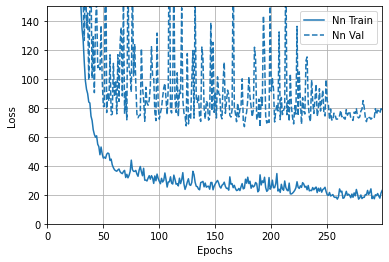

In [47]:
#plot results
matplotlib.pyplot.ylim(0,150)
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss')
plotter.plot({'nn':history})

In [48]:
#using model to predict validation data
pred_ages = adv_model.base_model.predict(validation_scaled).flatten()
pred_ages = pd.Series(pred_ages, index = validation_index, name = 'pred_age')

nn_results = pd.concat([validation_info, pred_ages], axis=1, sort=False, join='inner')

In [49]:
#quick view of metrics: #with BN right before Dense(1) and Activity Reg in all layers 0.1 noise position changed 0.001 lr
mae = np.median(np.abs(pred_ages - val_ages))
mse = np.mean((pred_ages - val_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 3.33721303025337
MSE: 59.71153421212114


In [50]:
#saving results
nn_results.to_pickle('results_validation/altum_age_revision.pkl')

## AltumAge Reduced (ElasticNet CpGs)

In [51]:
#neural network architecture
coeff = 0.05 * np.sqrt(2.0 * np.log(train_scaled.shape[1]) / train_scaled.shape[0]) 
noise = 0.1
initializer = tf.keras.initializers.LecunNormal(seed=1)
nn_model = Sequential([
    Input(shape=(699,), name = 'feature'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, coeff*10),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    Dense(1)
])

In [52]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=30, min_lr=0.00001)

adv_config = nsl.configs.make_adv_reg_config(multiplier=0.05, adv_step_size=0.005)
adv_model = nsl.keras.AdversarialRegularization(nn_model, adv_config=adv_config)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Compile, train, and evaluate.
adv_model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])

history = adv_model.fit({'feature': np.array(train_scaled[my_cpgs]), 'label': np.array(train_ages)}, 
                validation_data = {'feature': np.array(validation_scaled[my_cpgs]), 'label': np.array(val_ages)},
                batch_size=256, 
                epochs=300,
                verbose=0,
                callbacks=[model_checkpoint_callback, reduce_lr])

adv_model.load_weights(checkpoint_filepath)

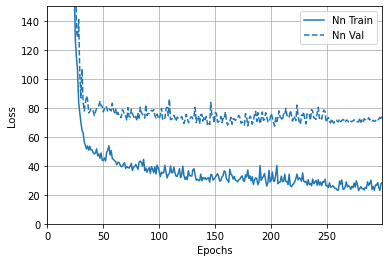

In [ ]:
#plot results
matplotlib.pyplot.ylim(0,150)
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss')
plotter.plot({'nn':history})

In [59]:
#using model to predict validation data
pred_ages = adv_model.base_model.predict(validation_scaled[my_cpgs]).flatten()
pred_ages = pd.Series(pred_ages, index = validation_index, name = 'pred_age')

nn_results = pd.concat([validation_info, pred_ages], axis=1, sort=False, join='inner')

In [ ]:
#quick view of metrics: #with BN right before Dense(1) and Activity Reg in all layers 0.1 noise position changed 0.001 lr
mae = np.median(np.abs(pred_ages - val_ages))
mse = np.mean((pred_ages - val_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 3.5162574185809383
MSE: 61.20245047021402


In [61]:
#saving results
nn_results.to_pickle('results_validation/altum_age_reduced_revision.pkl')

### _________________________________________________________________________________________________________

## Final Model Prediction

In [62]:
#load all train data for model training
count = 0   
for dataset in all_data:
    print(dataset)
    if count == 0:
        train = pd.read_pickle('./data_train/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('./data_train/' + dataset + '.pkl')
        train = pd.concat([train, new_df], join ='inner')
        gc.collect()
    clear_output()

In [63]:
#load all test data
count = 0   
for dataset in all_data:
    print(dataset)
    if count == 0:
        test = pd.read_pickle('./data_test/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('./data_test/' + dataset + '.pkl')
        test = pd.concat([test, new_df], join ='inner')
        gc.collect()
    clear_output()

In [64]:
#load all cancer data
count = 0   
for dataset in cancer_data:
    print(dataset)
    if count == 0:
        cancer = pd.read_pickle('./cancer_norm_pkl/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('./cancer_norm_pkl/' + dataset + '.pkl')
        cancer = pd.concat([cancer, new_df], join ='inner')
        gc.collect()
    clear_output()

In [65]:
#extracting age and removing unimportant columns
train_ages = train['age'].astype('float64')
test_ages = test['age'].astype('float64')
cancer_ages = cancer['age'].astype('float64')

train_info = train[['dataset', 'tissue_type', 'age', 'gender']]
test_info = test[['dataset', 'tissue_type', 'age', 'gender']]
cancer_info = cancer[['dataset', 'tissue_type', 'age', 'gender']]

train = train.drop(columns = ['dataset', 'tissue_type', 'age', 'gender'], axis=0)
test = test.drop(columns = ['dataset', 'tissue_type', 'age', 'gender'], axis=0)
cancer = cancer.drop(columns = ['dataset', 'tissue_type', 'age', 'gender'], axis=0)

In [66]:
print(train.shape)
print(test.shape)

(8050, 21368)
(5455, 21368)


In [67]:
#save names of columns and indexes
train_cols = train.columns
train_index = train.index

test_cols = test.columns
test_index = test.index

cancer_cols = cancer.columns
cancer_index = cancer.index

In [69]:
#scaling the regular data so each columns has 0 mean and variance 1
scaler = preprocessing.RobustScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train), index = train_index, columns = train_cols)
test_scaled = pd.DataFrame(scaler.transform(test), index = test_index, columns = test_cols)
cancer_scaled = pd.DataFrame(scaler.transform(cancer), index = cancer_index, columns = cancer_cols)

## Horvath

In [71]:
#using model to predict train and test data
pred_ages_train = anti_transform_age(horvath_model.predict(train[horvath_cpgs]))
pred_ages_train = pd.Series(pred_ages_train, index = train_index, name = 'pred_age')

horvath_results_train = pd.concat([train_info, pred_ages_train], axis=1, sort=False, join='inner')

pred_ages_test = anti_transform_age(horvath_model.predict(test[horvath_cpgs]))
pred_ages_test = pd.Series(pred_ages_test, index = test_index, name = 'pred_age')

horvath_results_test = pd.concat([test_info, pred_ages_test], axis=1, sort=False, join='inner')

pred_ages_cancer = anti_transform_age(horvath_model.predict(cancer[horvath_cpgs]))
pred_ages_cancer = pd.Series(pred_ages_cancer, index = cancer_index, name = 'pred_age')

horvath_results_cancer = pd.concat([cancer_info, pred_ages_cancer], axis=1, sort=False, join='inner')

/Users/lucascamillo/mambaforge/envs/singh_lab/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/lucascamillo/mambaforge/envs/singh_lab/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/lucascamillo/mambaforge/envs/singh_lab/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [46]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages_test - test_ages))
mse = np.mean((pred_ages_test - test_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 3.5304100228805666
MSE: 71.03074973735843


In [47]:
#saving results
horvath_results_train.to_pickle('results_train/horvath_revision.pkl')
horvath_results_test.to_pickle('results_test/horvath_revision.pkl')
horvath_results_cancer.to_pickle('results_cancer/horvath_revision.pkl')

## Linear Regression 353 CpGs

In [48]:
#fit model
linear_regression_model = linear_model.LinearRegression() 
linear_regression_model.fit(train[horvath_cpgs], transform_age(train_ages))

LinearRegression()

In [49]:
#using model to predict train and test data
pred_ages_train = anti_transform_age(linear_regression_model.predict(train[horvath_cpgs]))
pred_ages_train = pd.Series(pred_ages_train, index = train_index, name = 'pred_age')

linear_regression_results_train = pd.concat([train_info, pred_ages_train], axis=1, sort=False, join='inner')

pred_ages_test = anti_transform_age(linear_regression_model.predict(test[horvath_cpgs]))
pred_ages_test = pd.Series(pred_ages_test, index = test_index, name = 'pred_age')

linear_regression_results_test = pd.concat([test_info, pred_ages_test], axis=1, sort=False, join='inner')

In [50]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages_test - test_ages))
mse = np.mean((pred_ages_test - test_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 3.0111988366546925
MSE: 46.8666558764343


In [51]:
#saving results
linear_regression_results_train.to_pickle('results_train/linear_regression_353_revision.pkl')
linear_regression_results_test.to_pickle('results_test/linear_regression_353_revision.pkl')

## AltumAge 353

In [52]:
#neural network architecture
coeff = 0.05 * np.sqrt(2.0 * np.log(train_scaled.shape[1]) / train_scaled.shape[0]) 
noise = 0.1
initializer = tf.keras.initializers.LecunNormal(seed=1)
nn_model = Sequential([
    Input(shape=(353,), name = 'feature'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(coeff*5, coeff*5),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(coeff, coeff)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(coeff, coeff)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(coeff, coeff)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(coeff, coeff)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(coeff, coeff)),
    Activation('selu'),
    BatchNormalization(),
    Dense(1)
])

In [53]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [54]:
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=30, min_lr=0.00001)

adv_config = nsl.configs.make_adv_reg_config(multiplier=0.05, adv_step_size=0.005)
adv_model = nsl.keras.AdversarialRegularization(nn_model, adv_config=adv_config)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Compile, train, and evaluate.
adv_model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])

history = adv_model.fit({'feature': np.array(train_scaled[horvath_cpgs]), 'label': np.array(train_ages)}, 
                batch_size=256, 
                epochs=300,
                verbose=0,
                callbacks=[model_checkpoint_callback, reduce_lr])

adv_model.load_weights(checkpoint_filepath)

In [56]:
#using model to predict train and test data
pred_ages_train = adv_model.base_model.predict(train_scaled[horvath_cpgs]).flatten()
pred_ages_train = pd.Series(pred_ages_train, index = train_index, name = 'pred_age')

nn_results_train = pd.concat([train_info, pred_ages_train], axis=1, sort=False, join='inner')

pred_ages_test = adv_model.base_model.predict(test_scaled[horvath_cpgs]).flatten()
pred_ages_test = pd.Series(pred_ages_test, index = test_index, name = 'pred_age')

nn_results_test = pd.concat([test_info, pred_ages_test], axis=1, sort=False, join='inner')

pred_ages_cancer = adv_model.base_model.predict(cancer_scaled[horvath_cpgs]).flatten()
pred_ages_cancer = pd.Series(pred_ages_cancer, index = cancer_index, name = 'pred_age')

nn_results_cancer = pd.concat([cancer_info, pred_ages_cancer], axis=1, sort=False, join='inner')

In [57]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages_test - test_ages))
mse = np.mean((pred_ages_test - test_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 2.425426483154297
MSE: 32.732499437013516


In [58]:
#saving results
nn_results_train.to_pickle('results_train/altum_age_353_revision.pkl')
nn_results_test.to_pickle('results_test/altum_age_353_revision.pkl')
nn_results_cancer.to_pickle('results_cancer/altum_age_353_revision.pkl')

### Select only CpGs common to all 3 platforms

In [72]:
train_imp = train_imp[multi_platform_cpgs]
test_imp = test_imp[multi_platform_cpgs]
cancer_imp = cancer_imp[multi_platform_cpgs]
train_scaled = train_scaled[multi_platform_cpgs]
test_scaled = test_scaled[multi_platform_cpgs]
cancer_scaled = cancer_scaled[multi_platform_cpgs]

## Linear Regression all CpGs

In [60]:
#fit model
linear_regression_model = linear_model.LinearRegression() 
linear_regression_model.fit(train_imp, transform_age(train_ages))

LinearRegression()

In [61]:
#using model to predict train and test data
pred_ages_train = anti_transform_age(linear_regression_model.predict(train))
pred_ages_train = pd.Series(pred_ages_train, index = train_index, name = 'pred_age')

linear_regression_results_train = pd.concat([train_info, pred_ages_train], axis=1, sort=False, join='inner')

pred_ages_test = anti_transform_age(linear_regression_model.predict(test))
pred_ages_test = pd.Series(pred_ages_test, index = test_index, name = 'pred_age')

linear_regression_results_test = pd.concat([test_info, pred_ages_test], axis=1, sort=False, join='inner')

In [62]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages_test - test_ages))
mse = np.mean((pred_ages_test - test_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 3.455274978841075
MSE: 61.51115224369329


In [63]:
#saving results
linear_regression_results_train.to_pickle('results_train/linear_regression_all_revision.pkl')
linear_regression_results_test.to_pickle('results_test/linear_regression_all_revision.pkl')

## Elastic Net CV

In [73]:
#fit model
elastic_net_model = ElasticNet(alpha = 0.5, n_splits = 10, random_state = 42) 
elastic_net_model.fit(train, transform_age(train_ages))

ElasticNet(alpha=0.5, n_splits=10, random_state=42)

In [74]:
my_cpgs = train_imp.columns[elastic_net_model.coef_ != 0]

In [75]:
from pickle import dump
dump(elastic_net_model, open('elastic_net.pkl', 'wb'))

In [76]:
print('number of features: ' + str(np.sum(elastic_net_model.coef_ != 0))) 

number of features: 903


In [68]:
#using model to predict train and test data
pred_ages_train = anti_transform_age(elastic_net_model.predict(train))
pred_ages_train = pd.Series(pred_ages_train, index = train_index, name = 'pred_age')

elastic_net_results_train = pd.concat([train_info, pred_ages_train], axis=1, sort=False, join='inner')

pred_ages_test = anti_transform_age(elastic_net_model.predict(test))
pred_ages_test = pd.Series(pred_ages_test, index = test_index, name = 'pred_age')

elastic_net_results_test = pd.concat([test_info, pred_ages_test], axis=1, sort=False, join='inner')

pred_ages_cancer = anti_transform_age(elastic_net_model.predict(cancer))
pred_ages_cancer = pd.Series(pred_ages_cancer, index = cancer_index, name = 'pred_age')

elastic_net_results_cancer = pd.concat([cancer_info, pred_ages_cancer], axis=1, sort=False, join='inner')

In [69]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages_test - test_ages))
mse = np.mean((pred_ages_test - test_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 2.6209319454265625
MSE: 39.19778051673902


In [70]:
#saving results
elastic_net_results_train.to_pickle('results_train/elastic_net_revision.pkl')
elastic_net_results_test.to_pickle('results_test/elastic_net_revision.pkl')
elastic_net_results_cancer.to_pickle('results_cancer/elastic_net_revision.pkl')

## AltumAge Reduced (ElasticNet CpGs)

In [77]:
#neural network architecture
coeff = 0.05 * np.sqrt(2.0 * np.log(train_scaled.shape[1]) / train_scaled.shape[0]) 
noise = 0.1
initializer = tf.keras.initializers.LecunNormal(seed=1)
nn_model = Sequential([
    Input(shape=(903,), name = 'feature'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, coeff*10),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    Dense(1)
])

In [78]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [79]:
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

In [80]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=30, min_lr=0.00001)

adv_config = nsl.configs.make_adv_reg_config(multiplier=0.05, adv_step_size=0.005)
adv_model = nsl.keras.AdversarialRegularization(nn_model, adv_config=adv_config)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Compile, train, and evaluate.
adv_model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])

history = adv_model.fit({'feature': np.array(train_scaled[my_cpgs]), 'label': np.array(train_ages)}, 
                batch_size=256, 
                epochs=300,
                verbose=0,
                callbacks=[model_checkpoint_callback, reduce_lr])

adv_model.load_weights(checkpoint_filepath)

In [81]:
#using model to predict train and test data
pred_ages_train = adv_model.base_model.predict(train_scaled[my_cpgs]).flatten()
pred_ages_train = pd.Series(pred_ages_train, index = train_index, name = 'pred_age')

nn_results_train = pd.concat([train_info, pred_ages_train], axis=1, sort=False, join='inner')

pred_ages_test = adv_model.base_model.predict(test_scaled[my_cpgs]).flatten()
pred_ages_test = pd.Series(pred_ages_test, index = test_index, name = 'pred_age')

nn_results_test = pd.concat([test_info, pred_ages_test], axis=1, sort=False, join='inner')

pred_ages_cancer = adv_model.base_model.predict(cancer_scaled[my_cpgs]).flatten()
pred_ages_cancer = pd.Series(pred_ages_cancer, index = cancer_index, name = 'pred_age')

nn_results_cancer = pd.concat([cancer_info, pred_ages_cancer], axis=1, sort=False, join='inner')

In [82]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages_test - test_ages))
mse = np.mean((pred_ages_test - test_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 2.3023014068603516
MSE: 30.454544933341342


In [83]:
#saving results
nn_results_train.to_pickle('results_train/altum_age_reduced_revision.pkl')
nn_results_test.to_pickle('results_test/altum_age_reduced_revision.pkl')
nn_results_cancer.to_pickle('results_cancer/altum_age_reduced_revision.pkl')

## AltumAge

In [78]:
#neural network architecture
coeff = 0.05 * np.sqrt(2.0 * np.log(train_scaled.shape[1]) / train_scaled.shape[0]) 
noise = 0.1
initializer = tf.keras.initializers.LecunNormal(seed=1)
nn_model = Sequential([
    Input(shape=(20318,), name = 'feature'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, coeff*10),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    GaussianDropout(noise),
    ActivityRegularization(0, 0),
    Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
    Activation('selu'),
    BatchNormalization(),
    Dense(1)
])

In [79]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [80]:
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

In [81]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=30, min_lr=0.00001)

adv_config = nsl.configs.make_adv_reg_config(multiplier=0.05, adv_step_size=0.005)
adv_model = nsl.keras.AdversarialRegularization(nn_model, adv_config=adv_config)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Compile, train, and evaluate.
adv_model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])

history = adv_model.fit({'feature': np.array(train_scaled), 'label': np.array(train_ages)}, 
                batch_size=256, 
                epochs=300,
                verbose=0,
                callbacks=[model_checkpoint_callback, reduce_lr])

adv_model.load_weights(checkpoint_filepath)

In [82]:
adv_model.base_model.save('AltumAge_npj.h5')

In [83]:
#using model to predict train and test data
pred_ages_train = adv_model.base_model.predict(train_scaled).flatten()
pred_ages_train = pd.Series(pred_ages_train, index = train_index, name = 'pred_age')

nn_results_train = pd.concat([train_info, pred_ages_train], axis=1, sort=False, join='inner')

pred_ages_test = adv_model.base_model.predict(test_scaled).flatten()
pred_ages_test = pd.Series(pred_ages_test, index = test_index, name = 'pred_age')

nn_results_test = pd.concat([test_info, pred_ages_test], axis=1, sort=False, join='inner')

pred_ages_cancer = adv_model.base_model.predict(cancer_scaled).flatten()
pred_ages_cancer = pd.Series(pred_ages_cancer, index = cancer_index, name = 'pred_age')

nn_results_cancer = pd.concat([cancer_info, pred_ages_cancer], axis=1, sort=False, join='inner')

In [194]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages_test - test_ages))
mse = np.mean((pred_ages_test - test_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 2.153247833251953
MSE: 29.48580350816364


In [85]:
#saving results
nn_results_train.to_pickle('results_train/altum_age_revision.pkl')
nn_results_test.to_pickle('results_test/altum_age_revision.pkl')
nn_results_cancer.to_pickle('results_cancer/altum_age_revision.pkl')

In [ ]:
tabnet = TabNetRegressor()
tabnet.fit(
    np.array(train_scaled), np.array(train_ages).reshape(-1, 1),
    max_epochs = 300
)

In [21]:
#using model to predict train and test data
pred_ages_train = tabnet.predict(np.array(train_scaled)).flatten()
pred_ages_train = pd.Series(pred_ages_train, index = train_index, name = 'pred_age')

tabnet_results_train = pd.concat([train_info, pred_ages_train], axis=1, sort=False, join='inner')

pred_ages_test = tabnet.predict(np.array(test_scaled)).flatten()
pred_ages_test = pd.Series(pred_ages_test, index = test_index, name = 'pred_age')

tabnet_results_test = pd.concat([test_info, pred_ages_test], axis=1, sort=False, join='inner')

pred_ages_cancer = tabnet.predict(np.array(cancer_scaled)).flatten()
pred_ages_cancer = pd.Series(pred_ages_cancer, index = cancer_index, name = 'pred_age')

tabnet_results_cancer = pd.concat([cancer_info, pred_ages_cancer], axis=1, sort=False, join='inner')

In [23]:
#quick view of metrics:
mae = np.median(np.abs(pred_ages_test - test_ages))
mse = np.mean((pred_ages_test - test_ages)**2)
print('MAE: '+ str(mae))
print('MSE: '+ str(mse))

MAE: 2.501434326171875
MSE: 34.99708425893395


In [24]:
#saving results
tabnet_results_train.to_pickle('results_train/tabnet_revision.pkl')
tabnet_results_test.to_pickle('results_test/tabnet_revision.pkl')
tabnet_results_cancer.to_pickle('results_cancer/tabnet_revision.pkl')

In [25]:
saving_path_name = "./tabnet_model_test"
saved_filepath = tabnet.save_model(saving_path_name)

Successfully saved model at ./tabnet_model_test.zip


## LOOCV

In [7]:
#load all train data for model training
count = 0   
for dataset in all_data:
    print(dataset)
    if count == 0:
        train = pd.read_pickle('./data_train/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('./data_train/' + dataset + '.pkl')
        train = pd.concat([train, new_df], join ='inner')
        gc.collect()
    clear_output()

In [8]:
#load all test data
count = 0   
for dataset in all_data:
    print(dataset)
    if count == 0:
        test = pd.read_pickle('./data_test/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('./data_test/' + dataset + '.pkl')
        test = pd.concat([test, new_df], join ='inner')
        gc.collect()
    clear_output()

In [9]:
#extracting age and removing unimportant columns
train_ages = train['age'].astype('float64')
test_ages = test['age'].astype('float64')

train_info = train[['dataset', 'tissue_type', 'age', 'gender']]
test_info = test[['dataset', 'tissue_type', 'age', 'gender']]

train = train.drop(columns = ['dataset', 'tissue_type', 'age', 'gender'], axis=0)
test = test.drop(columns = ['dataset', 'tissue_type', 'age', 'gender'], axis=0)

In [10]:
#save names of columns and indexes
train_cols = train.columns
train_index = train.index

test_cols = test.columns
test_index = test.index

In [12]:
#dataframe to store all loocv results
loocv_nn = pd.DataFrame(columns = ['dataset', 'tissue_type', 'age', 'gender', 'pred_age'])
loocv_elastic_net = pd.DataFrame(columns = ['dataset', 'tissue_type', 'age', 'gender', 'pred_age'])

In [14]:
#loop to fit neural network in all training datasets but one, perform predictions, and store results
initializer = tf.keras.initializers.LecunNormal(seed=1)
count = 0
for dataset in np.unique(train_info[['dataset']])[count:]:
    
    random.seed(1)
    tf.random.set_seed(1)
    np.random.seed(1)
    
    gc.collect()
    clear_output()
    print(str(count) + ': ' + dataset)
    
    #create training and validation datasets for LOOCV
    new_train = train[train_info.dataset != dataset]
    validation = test[test_info.dataset == dataset]
    
    #scaling the data for the NN
    scaler = preprocessing.RobustScaler()
    new_train_scaled = pd.DataFrame(scaler.fit_transform(new_train), index = train.index[train_info.dataset != dataset], columns = multi_platform_cpgs)
    validation_scaled = pd.DataFrame(scaler.transform(validation), index = test.index[test_info.dataset == dataset], columns = multi_platform_cpgs)
  
    new_train_ages = train_ages[train_info.dataset != dataset]
    val_ages = test_ages[test_info.dataset == dataset]

    new_train_info = train_info[train_info.dataset != dataset]
    validation_info = test_info[test_info.dataset == dataset]
    
    new_train_cols = train.columns
    new_train_index = train.index[train_info.dataset != dataset]
    
    validation_cols = test.columns
    validation_index = test.index[test_info.dataset == dataset]
    
    #fit elastic net model
    elastic_net_model = ElasticNet(alpha = 0.5, n_splits = 10, random_state = 1, n_jobs = 3) 
    elastic_net_model.fit(new_train, transform_age(new_train_ages))

    my_cpgs = new_train.columns[elastic_net_model.coef_ != 0]
    
    #neural network
    #neural network architecture
    coeff = 0.05 * np.sqrt(2.0 * np.log(train_imp.shape[1]) / train_imp.shape[0]) 
    noise = 0.1
    initializer = tf.keras.initializers.LecunNormal(seed=1)
    nn_model = Sequential([
        Input(shape=(20318,), name = 'feature'),
        BatchNormalization(),
        GaussianDropout(noise),
        ActivityRegularization(0, coeff*10),
        Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
        Activation('selu'),
        BatchNormalization(),
        GaussianDropout(noise),
        ActivityRegularization(0, 0),
        Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
        Activation('selu'),
        BatchNormalization(),
        GaussianDropout(noise),
        ActivityRegularization(0, 0),
        Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
        Activation('selu'),
        BatchNormalization(),
        GaussianDropout(noise),
        ActivityRegularization(0, 0),
        Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
        Activation('selu'),
        BatchNormalization(),
        GaussianDropout(noise),
        ActivityRegularization(0, 0),
        Dense(32, kernel_initializer = initializer, kernel_regularizer=tf.keras.regularizers.l1_l2(0, coeff*2)),
        Activation('selu'),
        BatchNormalization(),
        Dense(1)
    ])
    
    checkpoint_filepath = '/tmp/checkpoint'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='loss',
        mode='min',
        save_best_only=True)
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=30, min_lr=0.00001)

    adv_config = nsl.configs.make_adv_reg_config(multiplier=0.05, adv_step_size=0.005)
    adv_model = nsl.keras.AdversarialRegularization(nn_model, adv_config=adv_config)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    # Compile, train, and evaluate.
    adv_model.compile(optimizer=optimizer,
                      loss='mse',
                      metrics=['mae'])

    history = adv_model.fit({'feature': np.array(new_train_scaled), 'label': np.array(new_train_ages)}, 
                    batch_size=256, 
                    epochs=300,
                    verbose=0,
                    callbacks=[model_checkpoint_callback, reduce_lr])

    adv_model.load_weights(checkpoint_filepath)
    nn_model = adv_model.base_model
    
    #using model to predict validation data
    
    pred_ages_elastic_net = anti_transform_age(elastic_net_model.predict(validation_imp))
    pred_ages_elastic_net = pd.Series(pred_ages_elastic_net, index = validation_index, name = 'pred_age')
    
    pred_ages_nn = nn_model.predict(validation).flatten()
    pred_ages_nn = pd.Series(pred_ages_nn, index = validation_index, name = 'pred_age')
      
    #storing results 
    elastic_net_results = pd.concat([validation_info, pred_ages_elastic_net], axis=1, sort=False, join='inner')
    loocv_elastic_net = pd.concat([loocv_elastic_net, elastic_net_results])
    
    nn_results = pd.concat([validation_info, pred_ages_nn], axis=1, sort=False, join='inner')
    loocv_nn = pd.concat([loocv_nn, nn_results])
    
    #saving results
    loocv_elastic_net.to_pickle('results_loocv/loocv_glmnet.pkl')
    loocv_nn.to_pickle('results_loocv/loocv_nn_revision.pkl')
    print('Done')
    
    count += 1

141: TCGA_UCEC
Done
